In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
import nltk
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Pre- process

In [4]:
data=pd.read_csv('/content/drive/MyDrive/CODSOFT/Project-3/spam.csv',encoding="ISO-8859-1")

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [8]:
data=data[['v1','v2']]
column_mapping = {'v1': 'label',
                  'v2': 'message'}
data=data.rename(columns=column_mapping)

In [9]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Tokenization
data['tokens'] = data['message'].apply(word_tokenize)

# Removing Stop Words
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join tokens into a single string
data['tokens'] = data['tokens'].apply(lambda x: ' '.join(x))

In [11]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')

def lemmatize_text_spacy(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

data['tokens'] = data['tokens'].apply(lemmatize_text_spacy)
data['message']=data['tokens'].apply(lambda x: ' '.join(x))
data.head()

,label,message,tokens
0,ham,"go jurong point , crazy .. available bugis n g...","[go, jurong, point, ,, crazy, .., available, b..."
1,ham,ok lar ... joke wif u oni ...,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,spam,free entry 2 wkly comp win FA Cup final tkts 2...,"[free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,u dun say early hor ... u c already say ...,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"Nah not think go usf , live around though","[Nah, not, think, go, usf, ,, live, around, th..."


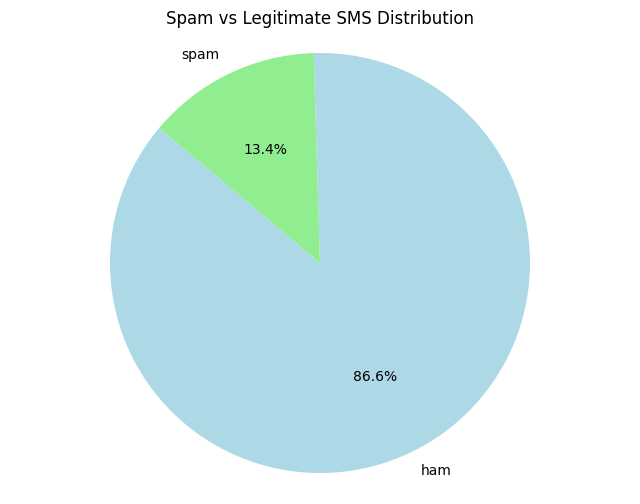

In [12]:
# Plotting Pie Chart for Spam vs Legitimate Distribution
label_counts = data['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Spam vs Legitimate SMS Distribution')
plt.axis('equal')
plt.show()

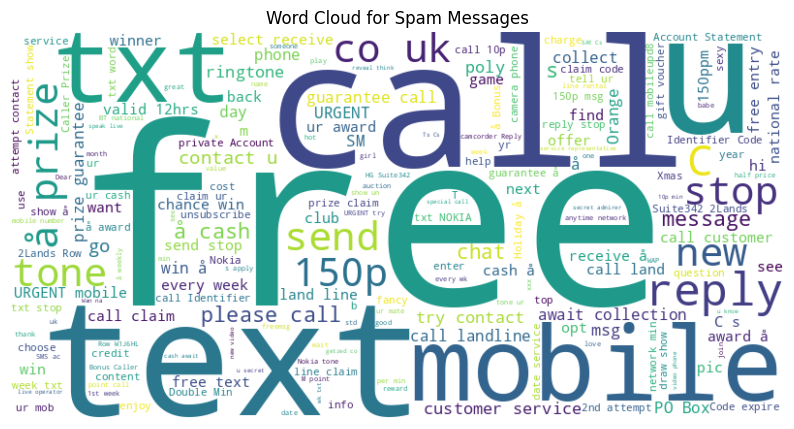

In [13]:
spam_messages = data[data['label'] == 'spam']['message']
spam_text = " ".join(spam_messages)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()



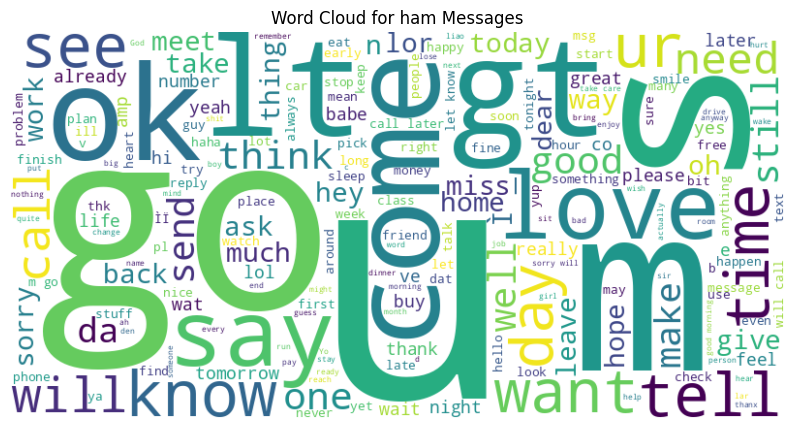

In [14]:
ham_messages = data[data['label'] == 'ham']['message']
ham_text = " ".join(ham_messages)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for ham Messages')
plt.show()

In [15]:
X = data['message']
y = data['label']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

tfidf_features = tfidf_vectorizer.get_feature_names_out()
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_features)

# Concatenate X_tfidf_df with the 'label' column from df
merged_df = pd.concat([X_tfidf_df, data['label']], axis=1)

In [16]:
first_row = merged_df.iloc[0]

non_zero_columns = [column for column, value in first_row.items() if value != 0]
print("Columns not containing zero in the first row:")
print(non_zero_columns)

Columns not containing zero in the first row:
['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'get', 'go', 'great', 'jurong', 'la', 'point', 'wat', 'world', 'label']


In [17]:
X = merged_df.drop(columns=['label'])
y = merged_df['label']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9449760765550239
Confusion Matrix:
[[1447    6]
 [  86  133]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1453
        spam       0.96      0.61      0.74       219

    accuracy                           0.94      1672
   macro avg       0.95      0.80      0.86      1672
weighted avg       0.95      0.94      0.94      1672



In [19]:
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear')
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")


Results for Naive Bayes:
Accuracy: 0.965311004784689
Confusion Matrix:
[[1453    0]
 [  58  161]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.74      0.85       219

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.96      1672



Results for Support Vector Machine:
Accuracy: 0.979066985645933
Confusion Matrix:
[[1451    2]
 [  33  186]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



